## Coffee Survey
목적 : 커피 로스트레벨, 과일향 선호도, 전체적인 커피 선호도를 알아봄

### **커피 샘플:** 네 가지 종류의 커피가 제공되었으며, 다음과 같은 특징을 갖습니다.

- **A:** 라이트 로스트, 워시드 프로세스
- **B:** 미디엄 로스트
- **C:** 다크 로스트
- **D:** 라이트 로스트, 내추럴 프로세스(발효, 과일향)

### **주요 질문:** 세 가지 주요 질문을 중심으로 데이터를 수집하였습니다.

1. 로스트 레벨 선호도 (A vs B vs C)
2. 과일향 선호도 (A vs D)
3. 전체적으로 가장 인기 있는 커피

## 데이터 구성

### **설문 1/3 - 테이스터 배경 정보:** 참가자들의 배경 정보를 수집합니다.

- **연령대, 우편번호, 커피 섭취량**
- **커피 마시는 장소:** 집, 카페, 직장 등
- **선호하는 커피 종류:** 에스프레소, 콜드 브루, 라떼 등
- **추가하는 재료:** 우유, 설탕, 향 시럽 등
- **기호:** 초콜릿, 과일, 플로럴 등
- **로스트 레벨 선호도, 카페인 강도, 커피 전문성 수준**

### **설문 2/3 - 테이스터 선호도:** 각 커피에 대한 평가입니다.

- **커피 A/B/C/D에 대한 평가:** 쓴맛, 산미, 개인 선호도, 테이스팅 노트
- **선호 커피 비교 질문:** A vs B vs C, A vs D
- **가장 선호하는 커피:** A, B, C, D 중 하나 선택

### **설문 3/3 - 추가 정보:** 커피 소비 습관 및 기타 배경 정보를 수집합니다.

- **근무 형태, 월 커피 지출, 커피를 마시는 이유, 커피 맛 선호 여부**
- **커피 출처 인식, 최대 지불할 수 있는 커피 가격, 장비 지출 내역**
- **성별, 결혼 상태, 가계 소득, 교육 수준, 인종/민족, 고용 상태, 자녀 수, 정치 성향**

## 목표
연령대, 성별, 가계 소득, 교육 수준, 정치 성향 등 참가자의 프로필에 따라 커피 선호도나 맛에 대한 평가가 어떻게 달라지는지 분석합니다.
특정 프로필을 가진 사람들이 선호하는 커피의 특징을 파악하고 마케팅 전략에 활용할 수 있습니다.

In [18]:
import pandas as pd
import numpy as np

In [19]:
data = pd.read_csv("GACTT_RESULTS_ANONYMIZED.csv")

In [20]:
data.head(5)

,Submission ID,Respondent ID,Submitted at,What is your age?,What is your ZIP code?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),...,Gender,Gender (please specify),Marital Status,Household Income,Education Level,Ethnicity/Race,Ethnicity/Race (please specify),Employment Status,Number of Children,Political Affiliation
0,gMR29l,vDzkBA,9/11/23 20:50,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,9Z4VME,9/11/23 20:52,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,XoNLQj,9/12/23 1:33,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,Gp7gde,9/12/23 12:58,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,Bp9ogQ,9/12/23 15:24,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data 전처리
1. 데이터 확인
2. 데이터 Type 확인
3. 결측치 처리
4. 통계분석

In [21]:
# 데이터 확인
print("Data", data.shape)

Data (4042, 118)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Columns: 118 entries, Submission ID to Political Affiliation
dtypes: float64(21), object(97)
memory usage: 3.6+ MB


In [23]:
missing_values_count_sorted = data.isnull().sum().sort_values(ascending=False)
print(missing_values_count_sorted)

What kind of flavorings do you add? (Other)             4042
What other flavoring do you use?                        4042
What kind of flavorings do you add? (Vanilla Syrup)     4042
What kind of flavorings do you add? (Caramel Syrup)     4042
What kind of flavorings do you add? (Hazelnut Syrup)    4042
                                                        ... 
What is your favorite coffee drink?                       62
What is your age?                                         31
Respondent ID                                              0
Submitted at                                               0
Submission ID                                              0
Length: 118, dtype: int64


In [24]:
# coffee taste Note까지 살림
threshold = 1000

# 임계값보다 많은 결측치를 가진 열 이름 추출
cols_to_drop = missing_values_count_sorted[missing_values_count_sorted > threshold].index

# 해당 열 삭제
data = data.drop(cols_to_drop, axis=1)

# 결과 확인
print("삭제된 열:", cols_to_drop.tolist())
print("남은 열:", data.columns.tolist())

삭제된 열: ['What kind of flavorings do you add? (Other)', 'What other flavoring do you use?', 'What kind of flavorings do you add? (Vanilla Syrup)', 'What kind of flavorings do you add? (Caramel Syrup)', 'What kind of flavorings do you add? (Hazelnut Syrup)', 'What kind of flavorings do you add? (Cinnamon (Ground or Stick))', 'What kind of flavorings do you add? (Peppermint Syrup)', 'What kind of flavorings do you add?', 'Gender (please specify)', 'Where else do you purchase coffee?', 'What else do you add to your coffee?', 'Ethnicity/Race (please specify)', 'Please specify what your favorite coffee drink is', 'Other reason for drinking coffee', 'What kind of sugar or sweetener do you add?', 'What kind of sugar or sweetener do you add? (Agave Nectar)', 'What kind of sugar or sweetener do you add? (Maple Syrup)', 'What kind of sugar or sweetener do you add? (Stevia)', 'What kind of sugar or sweetener do you add? (Raw Sugar (Turbinado))', 'What kind of sugar or sweetener do you add? (Brown 

In [25]:
data.isnull().sum()

,0
Submission ID,0
Respondent ID,0
Submitted at,0
What is your age?,31
What is your ZIP code?,78
...,...
Household Income,749
Education Level,604
Ethnicity/Race,624
Employment Status,623


In [26]:
data.columns

Index(['Submission ID', 'Respondent ID', 'Submitted at', 'What is your age?',
       'What is your ZIP code?',
       'How many cups of coffee do you typically drink per day?',
       'Where do you typically drink coffee?',
       'Where do you typically drink coffee? (At home)',
       'Where do you typically drink coffee? (At the office)',
       'Where do you typically drink coffee? (On the go)',
       'Where do you typically drink coffee? (At a cafe)',
       'Where do you typically drink coffee? (None of these)',
       'How do you brew coffee at home?',
       'How do you brew coffee at home? (Pour over)',
       'How do you brew coffee at home? (French press)',
       'How do you brew coffee at home? (Espresso)',
       'How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))',
       'How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))',
       'How do you brew coffee at home? (Instant coffee)',
       'How do you brew coffee at hom

In [ ]:
# 결측치 제거

In [28]:
data = data.dropna()
data.isnull().sum()

,0
Submission ID,0
Respondent ID,0
Submitted at,0
What is your age?,0
What is your ZIP code?,0
...,...
Household Income,0
Education Level,0
Ethnicity/Race,0
Employment Status,0


In [32]:
data.head()

,Submission ID,Respondent ID,Submitted at,What is your age?,What is your ZIP code?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),...,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Marital Status,Household Income,Education Level,Ethnicity/Race,Employment Status,Political Affiliation
34,ylqbBg,KVG007,10/21/23 17:12,45-54 years old,48105,2,"At home, At the office, At a cafe, On the go",True,True,True,...,No,$500-$1000,Yes,Male,Married,"$100,000 - $149,999",Master's degree,Other (please specify),Employed full-time,No affiliation
41,YZzBdN,W8q0dk,10/21/23 17:19,25-34 years old,505415,2,"At home, At the office",True,True,False,...,Yes,$50-$100,Yes,Male,Single,"Under $25,000",Master's degree,Asian/Pacific Islander,Unemployed,Independent
42,VZ17Z6,Ex60gl,10/21/23 17:19,35-44 years old,38138,1,"At the office, At home",True,True,False,...,Yes,$100-$300,Yes,Male,Married,"$75,000 - $99,999",Bachelor's degree,White/Caucasian,Employed full-time,No affiliation
43,RzBeZj,g9z4V4,10/21/23 17:21,45-54 years old,60538,More than 4,At home,True,False,False,...,Yes,$300-$500,Yes,Male,Married,"$150,000 or more",Bachelor's degree,White/Caucasian,Employed full-time,No affiliation
46,WApbkQ,Q740Lg,10/21/23 17:30,35-44 years old,90210,2,"At a cafe, At home",True,False,False,...,Yes,"More than $1,000",Yes,Male,Living with a partner,"$150,000 or more",Less than high school,Black/African American,Unemployed,Independent


In [33]:
# 분석에 필요한 열만 남기기
# 필요한 열들의 리스트 생성
necessary_columns = [
    'What is your age?',
    'Gender',
    'Household Income',
    'Education Level',
    'Political Affiliation',
    'Marital Status',
    'Ethnicity/Race',
    'Employment Status',
    'Coffee A - Bitterness',
    'Coffee A - Acidity',
    'Coffee A - Personal Preference',
    'Coffee B - Bitterness',
    'Coffee B - Acidity',
    'Coffee B - Personal Preference',
    'Coffee C - Bitterness',
    'Coffee C - Acidity',
    'Coffee C - Personal Preference',
    'Coffee D - Bitterness',
    'Coffee D - Acidity',
    'Coffee D - Personal Preference',
    'Lastly, what was your favorite overall coffee?'
]

data = data[necessary_columns]

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2823 entries, 34 to 4041
Data columns (total 21 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   What is your age?                               2823 non-null   object 
 1   Gender                                          2823 non-null   object 
 2   Household Income                                2823 non-null   object 
 3   Education Level                                 2823 non-null   object 
 4   Political Affiliation                           2823 non-null   object 
 5   Marital Status                                  2823 non-null   object 
 6   Ethnicity/Race                                  2823 non-null   object 
 7   Employment Status                               2823 non-null   object 
 8   Coffee A - Bitterness                           2823 non-null   float64
 9   Coffee A - Acidity                           

In [39]:
data.head(20)

,What is your age?,Gender,Household Income,Education Level,Political Affiliation,Marital Status,Ethnicity/Race,Employment Status,Coffee A - Bitterness,Coffee A - Acidity,...,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference,"Lastly, what was your favorite overall coffee?"
34,45-54 years old,Male,"$100,000 - $149,999",Master's degree,No affiliation,Married,Other (please specify),Employed full-time,3.0,3.0,...,3.0,3.0,5.0,4.0,3.0,3.0,5.0,2.0,3.0,Coffee B
41,25-34 years old,Male,"Under $25,000",Master's degree,Independent,Single,Asian/Pacific Islander,Unemployed,1.0,4.0,...,1.0,4.0,4.0,1.0,4.0,4.0,2.0,4.0,4.0,Coffee A
42,35-44 years old,Male,"$75,000 - $99,999",Bachelor's degree,No affiliation,Married,White/Caucasian,Employed full-time,1.0,4.0,...,3.0,2.0,4.0,3.0,4.0,1.0,1.0,4.0,5.0,Coffee D
43,45-54 years old,Male,"$150,000 or more",Bachelor's degree,No affiliation,Married,White/Caucasian,Employed full-time,2.0,3.0,...,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,Coffee A
46,35-44 years old,Male,"$150,000 or more",Less than high school,Independent,Living with a partner,Black/African American,Unemployed,3.0,4.0,...,2.0,3.0,4.0,2.0,3.0,4.0,1.0,2.0,3.0,Coffee A
47,45-54 years old,Male,"$150,000 or more",Bachelor's degree,Republican,Married,White/Caucasian,Employed full-time,4.0,3.0,...,2.0,2.0,4.0,3.0,2.0,3.0,3.0,4.0,5.0,Coffee D
48,35-44 years old,Male,"$100,000 - $149,999",Bachelor's degree,Democrat,Single,White/Caucasian,Employed full-time,1.0,5.0,...,2.0,3.0,3.0,2.0,3.0,4.0,2.0,2.0,5.0,Coffee D
56,25-34 years old,Male,"$100,000 - $149,999",Bachelor's degree,Democrat,Married,White/Caucasian,Employed full-time,2.0,4.0,...,4.0,3.0,5.0,3.0,3.0,4.0,2.0,5.0,2.0,Coffee B
57,35-44 years old,Male,"$150,000 or more",Bachelor's degree,Democrat,Married,White/Caucasian,Employed full-time,1.0,2.0,...,4.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,5.0,Coffee D
61,25-34 years old,Male,"$50,000 - $74,999",Bachelor's degree,Democrat,Single,White/Caucasian,Employed full-time,2.0,4.0,...,5.0,1.0,2.0,3.0,3.0,3.0,1.0,5.0,5.0,Coffee D


In [ ]:
# What is your age? 범위(str) -> Age_numeric 중앙값(float)

In [40]:
age_mapping = {
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 or older': 70
}
data['Age_numeric'] = data['What is your age?'].map(age_mapping)

In [42]:
print(data[['What is your age?', 'Age_numeric']].head())

   What is your age?  Age_numeric
34   45-54 years old         49.5
41   25-34 years old         29.5
42   35-44 years old         39.5
43   45-54 years old         49.5
46   35-44 years old         39.5


                                Age_numeric  Coffee A - Personal Preference  \
Age_numeric                        1.000000                       -0.067509   
Coffee A - Personal Preference    -0.067509                        1.000000   
Coffee B - Personal Preference     0.078063                       -0.226282   
Coffee C - Personal Preference     0.076800                       -0.260012   
Coffee D - Personal Preference    -0.182950                        0.242396   

                                Coffee B - Personal Preference  \
Age_numeric                                           0.078063   
Coffee A - Personal Preference                       -0.226282   
Coffee B - Personal Preference                        1.000000   
Coffee C - Personal Preference                        0.177243   
Coffee D - Personal Preference                       -0.357310   

                                Coffee C - Personal Preference  \
Age_numeric                                           0.076800

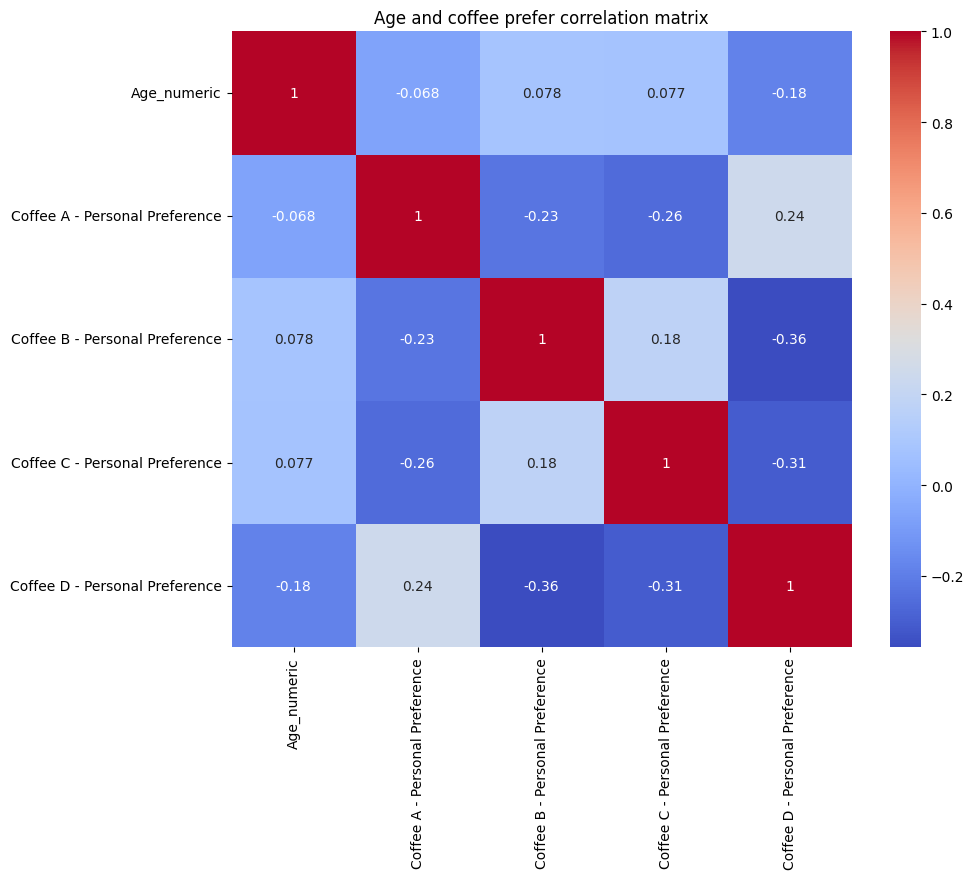

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_vars = ['Age_numeric',
             'Coffee A - Personal Preference', 'Coffee B - Personal Preference',
             'Coffee C - Personal Preference', 'Coffee D - Personal Preference']

# 상관계수 계산
corr_matrix = data[corr_vars].corr(method='pearson')

# 상관계수 출력
print(corr_matrix)

# 상관계수 출력
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Age and coffee prefer correlation matrix')
plt.show()

In [47]:
import scipy.stats as stats
import statsmodels.api as sm

# 성별에 따른 커피 선호도 차이 (t-검정)
data['Gender_binary'] = data['Gender'].map({'Male': 1, 'Female': 0})

# 성별 그룹별로 Coffee A 선호도 평균 계산
a_male_pref = data[data['Gender_binary'] == 1]['Coffee A - Personal Preference']
a_female_pref = data[data['Gender_binary'] == 0]['Coffee A - Personal Preference']

# 성별 그룹별로 Coffee B 선호도 평균 계산
b_male_pref = data[data['Gender_binary'] == 1]['Coffee B - Personal Preference']
b_female_pref = data[data['Gender_binary'] == 0]['Coffee B - Personal Preference']

# 성별 그룹별로 Coffee C 선호도 평균 계산
c_male_pref = data[data['Gender_binary'] == 1]['Coffee C - Personal Preference']
c_female_pref = data[data['Gender_binary'] == 0]['Coffee C - Personal Preference']

a_t_stat, a_p_value = stats.ttest_ind(a_male_pref, a_female_pref)
b_t_stat, b_p_value = stats.ttest_ind(b_male_pref, b_female_pref)
c_t_stat, c_p_value = stats.ttest_ind(c_male_pref, c_female_pref)

print(f"A t-통계량: {a_t_stat}, p-값: {a_p_value}")
print(f"B t-통계량: {b_t_stat}, p-값: {b_p_value}")
print(f"C t-통계량: {c_t_stat}, p-값: {c_p_value}")

A t-통계량: 6.092520525622477, p-값: 1.2687373610054136e-09
B t-통계량: -4.444919965572669, p-값: 9.144901116728552e-06
C t-통계량: -3.2756310007264173, p-값: 0.0010675069916925115


커피 A <br>
t-통계량이 양수이므로, 첫 번째 그룹(남성)의 평균이 두 번째 그룹(여성)의 평균보다 높다는 것을 의미합니다.
p-값이 매우 작아 0.05보다 훨씬 작으므로, 성별에 따른 커피 A 선호도 차이는 통계적으로 유의미하다고 판단합니다.
따라서, 남성이 여성보다 커피 A를 더 선호한다고 볼 수 있습니다.<br>
커피 B<br>
t-통계량이 음수이므로, 남성의 평균이 여성의 평균보다 낮다는 것을 의미합니다. p-값이 0.05보다 작으므로, 성별에 따른 커피 B 선호도 차이는 통계적으로 유의미하다고 판단합니다. 따라서, 여성이 남성보다 커피 B를 더 선호한다고 볼 수 있습니다.<br>
커피 C <br>
t-통계량이 음수이므로, 남성의 평균이 여성의 평균보다 낮다는 것을 의미합니다. p-값이 0.05보다 작으므로, 성별에 따른 커피 C 선호도 차이는 통계적으로 유의미하다고 판단합니다. 따라서, 여성이 남성보다 커피 C를 더 선호한다고 볼 수 있습니다.


In [49]:
# one-hot-encoding
categorical_columns = [
    'Household Income',
    'Education Level',
    'Political Affiliation',
    'Marital Status',
    'Ethnicity/Race',
    'Employment Status',
    'Lastly, what was your favorite overall coffee?'
]
df_encoded = pd.get_dummies(data, columns=categorical_columns)

In [50]:
df_encoded.head()

,What is your age?,Gender,Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,...,Employment Status_Employed full-time,Employment Status_Employed part-time,Employment Status_Homemaker,Employment Status_Retired,Employment Status_Student,Employment Status_Unemployed,"Lastly, what was your favorite overall coffee?_Coffee A","Lastly, what was your favorite overall coffee?_Coffee B","Lastly, what was your favorite overall coffee?_Coffee C","Lastly, what was your favorite overall coffee?_Coffee D"
34,45-54 years old,Male,3.0,3.0,4.0,3.0,3.0,5.0,4.0,3.0,...,True,False,False,False,False,False,False,True,False,False
41,25-34 years old,Male,1.0,4.0,4.0,1.0,4.0,4.0,1.0,4.0,...,False,False,False,False,False,True,True,False,False,False
42,35-44 years old,Male,1.0,4.0,3.0,3.0,2.0,4.0,3.0,4.0,...,True,False,False,False,False,False,False,False,False,True
43,45-54 years old,Male,2.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,...,True,False,False,False,False,False,True,False,False,False
46,35-44 years old,Male,3.0,4.0,5.0,2.0,3.0,4.0,2.0,3.0,...,False,False,False,False,False,True,True,False,False,False


In [51]:
df_encoded.drop(columns=['What is your age?'], inplace=True)

In [52]:
df_encoded.drop(columns=['Gender'], inplace=True)

In [54]:
print(df_encoded.columns.tolist())

['Coffee A - Bitterness', 'Coffee A - Acidity', 'Coffee A - Personal Preference', 'Coffee B - Bitterness', 'Coffee B - Acidity', 'Coffee B - Personal Preference', 'Coffee C - Bitterness', 'Coffee C - Acidity', 'Coffee C - Personal Preference', 'Coffee D - Bitterness', 'Coffee D - Acidity', 'Coffee D - Personal Preference', 'Age_numeric', 'Gender_binary', 'Household Income_$100,000 - $149,999', 'Household Income_$150,000 or more', 'Household Income_$25,000 - $49,999', 'Household Income_$50,000 - $74,999', 'Household Income_$75,000 - $99,999', 'Household Income_Under $25,000', "Education Level_Bachelor's degree", 'Education Level_Doctorate or professional degree', 'Education Level_High school graduate', 'Education Level_Less than high school', "Education Level_Master's degree", "Education Level_Some college or associate's degree", 'Political Affiliation_Democrat', 'Political Affiliation_Independent', 'Political Affiliation_No affiliation', 'Political Affiliation_Republican', 'Marital Sta

In [56]:
import re
# 열 이름 정리 함수
def clean_column_name(col):
    # 모든 특수 문자를 밑줄로 대체
    col = re.sub(r'[^\w]', '_', col)
    # 연속된 밑줄을 하나의 밑줄로 축소
    col = re.sub(r'__+', '_', col)
    # 앞뒤 밑줄 제거
    col = col.strip('_')
    return col

# 열 이름 정리 적용
df_encoded.columns = [clean_column_name(col) for col in df_encoded.columns]

# 정리된 열 이름 확인
df_encoded.columns.tolist()

['Coffee_A_Bitterness',
 'Coffee_A_Acidity',
 'Coffee_A_Personal_Preference',
 'Coffee_B_Bitterness',
 'Coffee_B_Acidity',
 'Coffee_B_Personal_Preference',
 'Coffee_C_Bitterness',
 'Coffee_C_Acidity',
 'Coffee_C_Personal_Preference',
 'Coffee_D_Bitterness',
 'Coffee_D_Acidity',
 'Coffee_D_Personal_Preference',
 'Age_numeric',
 'Gender_binary',
 'Household_Income_100_000_149_999',
 'Household_Income_150_000_or_more',
 'Household_Income_25_000_49_999',
 'Household_Income_50_000_74_999',
 'Household_Income_75_000_99_999',
 'Household_Income_Under_25_000',
 'Education_Level_Bachelor_s_degree',
 'Education_Level_Doctorate_or_professional_degree',
 'Education_Level_High_school_graduate',
 'Education_Level_Less_than_high_school',
 'Education_Level_Master_s_degree',
 'Education_Level_Some_college_or_associate_s_degree',
 'Political_Affiliation_Democrat',
 'Political_Affiliation_Independent',
 'Political_Affiliation_No_affiliation',
 'Political_Affiliation_Republican',
 'Marital_Status_Divorced

In [58]:
# True와 False를 1과 0으로 변환
df_encoded = df_encoded.replace({True: 1, False: 0})


<ipython-input-58-6c2e332d3e06>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({True: 1, False: 0})


In [59]:
df_encoded.to_csv('result.csv')

In [ ]:
# power bi 작동안됨

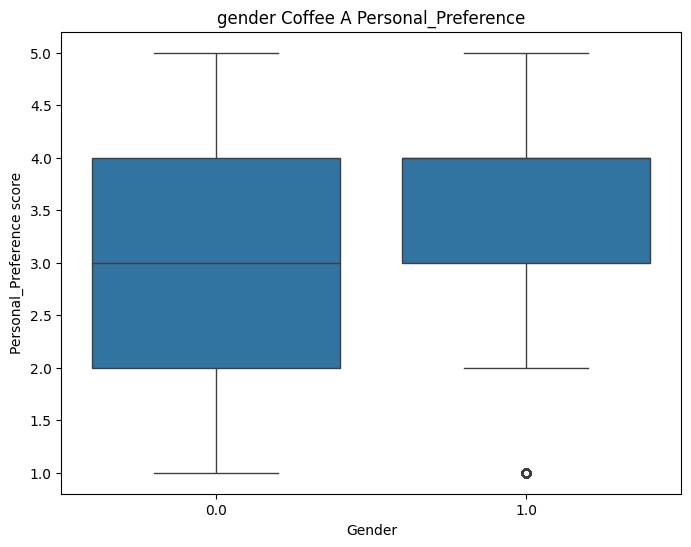

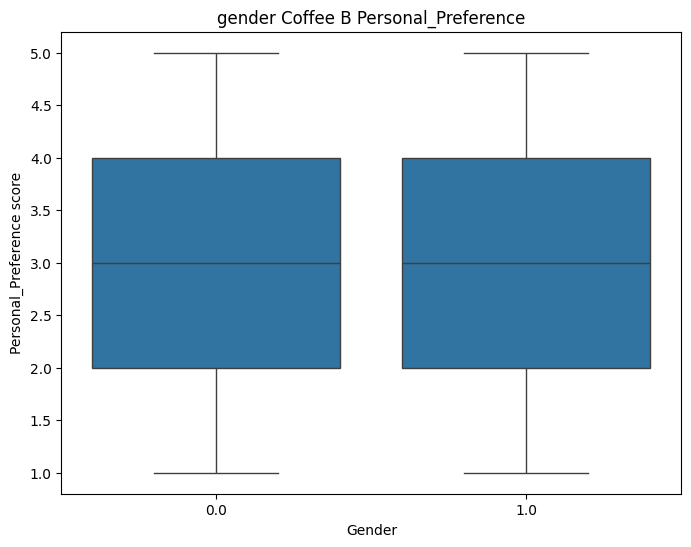

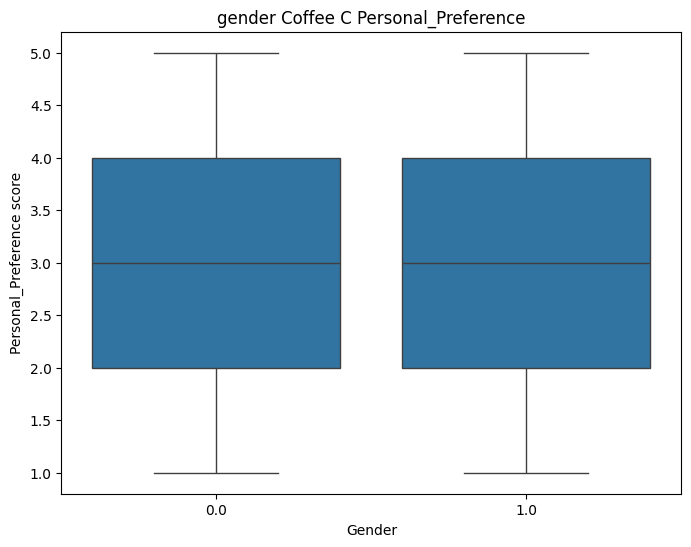

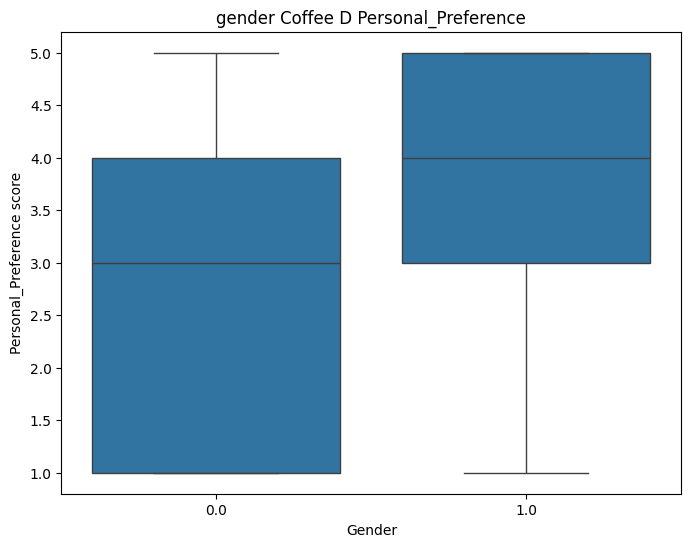

In [64]:
# 커피 종류 리스트
coffee_types = ['Coffee_A_Personal_Preference', 'Coffee_B_Personal_Preference', 'Coffee_C_Personal_Preference', 'Coffee_D_Personal_Preference']

for coffee in coffee_types:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Gender_binary', y=coffee, data=df_encoded)
    coffee_name = coffee.replace('_Personal_Preference', '').replace('Coffee_', 'Coffee ')
    plt.title(f'gender {coffee_name} Personal_Preference')
    plt.xlabel('Gender')
    plt.ylabel('Personal_Preference score')
    plt.show()

<Figure size 1000x600 with 0 Axes>

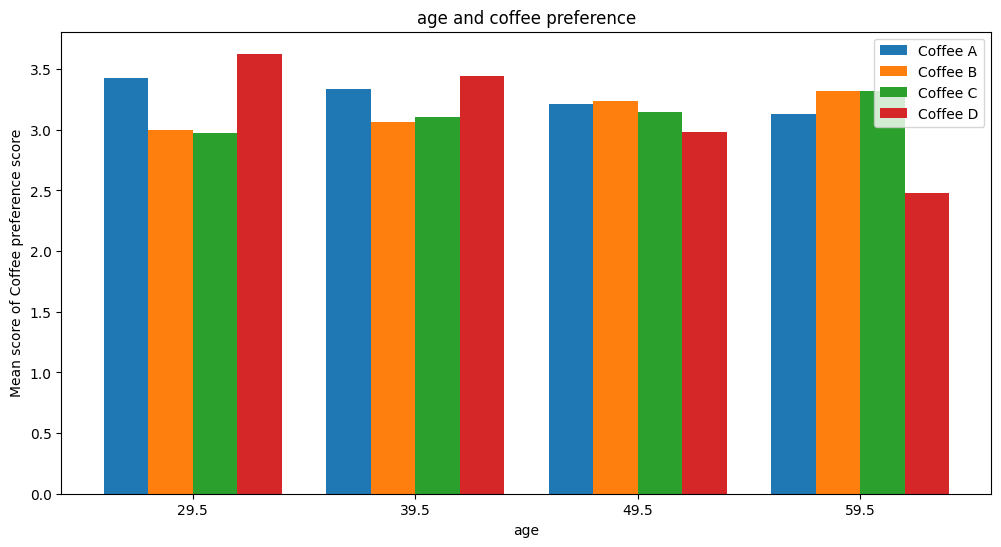

In [70]:
plt.figure(figsize=(10, 6))

# 커피 선호도 열 목록
coffee_preferences = ['Coffee_A_Personal_Preference', 'Coffee_B_Personal_Preference',
                      'Coffee_C_Personal_Preference', 'Coffee_D_Personal_Preference']

# 커피 종류에 대한 색상 설정
colors = ['blue', 'green', 'red', 'purple']
labels = ['Coffee A', 'Coffee B', 'Coffee C', 'Coffee D']

# 나이별로 커피 선호도 평균 계산
age_group = df_encoded.groupby('Age_numeric')[coffee_preferences].mean().reset_index()

# 막대의 폭 설정
bar_width = 0.2

# X축 위치 설정
r = np.arange(len(age_group['Age_numeric']))

# 그래프 그리기
plt.figure(figsize=(12, 6))

plt.bar(r - bar_width*1.5, age_group['Coffee_A_Personal_Preference'], width=bar_width, label='Coffee A')
plt.bar(r - bar_width*0.5, age_group['Coffee_B_Personal_Preference'], width=bar_width, label='Coffee B')
plt.bar(r + bar_width*0.5, age_group['Coffee_C_Personal_Preference'], width=bar_width, label='Coffee C')
plt.bar(r + bar_width*1.5, age_group['Coffee_D_Personal_Preference'], width=bar_width, label='Coffee D')

# 그래프 꾸미기
plt.title('age and coffee preference')
plt.xlabel('age')
plt.ylabel('Mean score of Coffee preference score')
plt.xticks(r, age_group['Age_numeric'])
plt.legend()
plt.show()

커피 경험과 선호도에 관한 관계를 알아보았다. 먼저 커피 경험은 연령대별 선호도 순위를 통해 다양한 패턴을 보인다고 여길 수 있다. 29.5세에서는 커피 D, A, B, C 순서로 선호도가 높았고, 39.5세에서는 D, A, C, B 순으로 나타났다. 49.5세에서는 B, A, C, D 순서로, 59.5세에서는 C, B, A, D 순서로 선호도가 나타나, 연령대에 따라 선호하는 커피 종류에 차이가 있음을 알 수 있었다. A와 D는 전반적으로 젊을수록 선호하고 점점 선호도가 떨어지는 반면 B와 C는 나이가 많아질수록 선호하는 경향을 보인다. 또한 t-검정에서도 볼 수 있듯이 성별과 선호하는 커피의 종류사이에는 유의미한 통계적 의미가 있는데 박스plot그래프를 보면 알 수 있듯이 각각 선호하는 커피가 존재함을 알 수 있었다.